# **Authors**: José Antonio Valderrama & Eric Vidal

# Solving the Graph Coloring Problem (GCP) with Grover's algortihm and Quantum Approximate Optimization Algorithm (QAOA)

## Problem definition

In the concerning research, we propose a **comparison between Grover's algorithm** (which has already been presented in the workshop) and **QAOA** applied to the **vertex coloring problem** which is an NP-complete problem contained in the class of GCP.
This study is following the lines of one of the author's work [Vidal](https://diposit.ub.edu/dspace/handle/2445/201868) done in 2023 where a comparison between the QAOA and AQO is performed using `Qibo` instead of `Qiskit`.
Graph coloring has been widely studied because it is a subfield highly important in the graph theory field, inspired by the **Four Color Problem**. 
Plus, it has many applications and relationships within real-life problems, such as scheduling problems including assigning frequencies for radio stations or for a mobile phone network, job shop scheduling, resource allocation, or flight-gate assignments.


## Introduction to QAOA

The recent improvement of quantum computation hardware has led to the **noisy intermediate-scale quantum (NISQ) era**. 
In this context, an increasing number of variational quantum algorithms (**VQAs**) have arisen with the target of solving combinatorial optimization problems (**COPs**) and achieving quantum advantage.
The main idea of VQAs is to run a _*parameterized quantum circuit*_ in a model gate-based quantum computer and train these parameters with the aid of *_classical optimizers_*.
A promising one is the **QAOA**, introduced by [Farhi et al.](https://arxiv.org/abs/1411.4028) in 2014, which is inspired by a *_Trotterized adiabatic transformation_* for the adiabatic evolution applied to the gate-based model. 

![QAOA explanation](img_VQA_QAOA.png "QAOA in VQA")

It is worth mentioning that **quantum annealing** (QA), as well as VQAs, were conceived as a heuristic approach to solve COPs, especially the ones that can be expressed as **binary optimization problems** with Boolean variables $x_i \in \{0, \; 1\}$.
Binary optimization involves a wide range of important problems, e. g., social network analysis, portfolio optimization in finance, traffic management and scheduling in transportation, lead optimization in pharmaceutical drug discovery $\ldots$

Taking into account the hardware challange to interact with many qubits, it is mainly aimed to solve Quadratic Unconstrained Binary Optimization **(QUBO) problems** with *_2-local interactions_*. Its **cost function** is defined as,
$$
    H_{QUBO} (\vec{x}) = \sum_i h_i x_i + \sum_{ij} Q_{ij} x_i x_j .
$$

However, it could work for solving higher order problems in opposition to the Adiabatic Quantum Optimization (AQO) algorithm.
If the hardware is improved to perform k-local interactions, with $k \geq 3$, high-order polynomial unconstrained binary optimization problems (HOBO) would aim to solve polynomial unconstrained binary optimization (PUBO) problems.

Those might seem strong restrictions, however, lots of problems of interest not only for industry but for academia as well, fall into this category.
The Karp's 21 NP-complete problems and many NP-hard problems have a close connection to Ising spin models that can be formulated as QUBO problems.
A good example of that is the work done by [Andrew Lucas](https://arxiv.org/abs/1302.5843) where he proposes Ising spin Hamiltonians for these kind of problems.


### COP encoding on a Quantum Computer

When we are dealing with generic COPs of size $N$ usually we have to either **maximize** or **minimize** a *_cost function_* (also known as objective or loss function), $f: Z(N) \xrightarrow{} \mathbb{R}$, where $Z(N)$ is the set of bit strings with length $N$,
$$
    \min_{z \in S} f(z), \quad S \subseteq Z(N),
$$
where $S$ is the set of feasible bit strings, and we define, $S_{min}$, as the subset of all solutions minimizing $f$. If $S = Z(N)$, it is said that the problem is **unconstrained**.

To work with a quantum computer we have to express each *_bit string_*, $z$, in the *_computational basis_*, $\ket{z}$ of the N-qubit space, $\mathcal{H} = \mathbb{C}^{2^N}$. 
This means that each bit, $z_i = 0, \; 1$ of the bit string $z$ is replaced by a spin-1/2 qubit labeled by $\ket{z_i}$, in a way that $\ket{z}$ is the Kronecker product of all the qubit states.
These are eigenstates of the $z$ component of the i-th spin,
$$
    \ket{0} = \begin{pmatrix} 1 \\ 0  \end{pmatrix}, \quad \ket{1} = \begin{pmatrix} 0 \\ 1  \end{pmatrix}
$$
so
$$
    \frac{1}{2} (1 - \sigma_z^{(i)}) \ket{z_i} = z_i \ket{z_i}
$$
where $\sigma_z^{(i)}$ is the corresponding Pauli matrix.
Lastly, the **cost Hamiltonian** can be constructed as,
$$
    C = \sum_{z \in Z(N)} f(z) \ket{z}\bra{z}.
$$
Therefore, solving the problem is finding an **optimal solution** in a way that falls to a computational basis state in $S_{min}$ which turns out to be the Hilbert subspace with **minimum eigenvalue**.

## QAOA formulation

The QAOA is a variational quantum algorithm that iteratively adds $p$ layers of a **pair of parameter dependent unitary operators** to a given initial quantum state. The first unitary, also called **mixer**, depends on an *_initial Hamiltonian_*, $B$,
$$
    U_B (\beta) = e^{-i \beta B}
$$
with $\beta \in [0, \pi]$, whilst the second one, known as **phase separator**, depends on the *_problem Hamiltonian_*, $C$,
$$
    U_C (\gamma) = e^{-i \gamma C}.
$$
with $\gamma \in [0, 2 \pi]$.
These are executed into a **fixed initial state**, that is usually selected to be the *_superposition of all the elements_* in the *_computational basis_*,
$$
    \ket{s} = \frac{1}{\sqrt{2^N}} \sum_{z \in Z(N)} \ket{z}
$$
which is the superposition of all possible solutions (for unconstrained problems).

From these unitaries, a parametrized trial state is constructed as,
$$ 
    \ket{\vec{\beta}, \vec{\gamma}} = V(\vec{\beta}, \vec{\gamma}) \ket{s} = \left( \prod_{q=1}^p U_B(\beta_p) U_C (\gamma_q) \right) \ket{s}.
$$

The parameters of the trial state are optimized by minimizing the value of the following eqaution, i.e. the **expected value** of the *_cost Hamiltonian_*, with a **classical optimizer**.
$$
    F_p (\vec{\beta}, \vec{\gamma}) = \bra{\vec{\beta}, \vec{\gamma}} C \ket{\vec{\beta}, \vec{\gamma}}.
$$
Once this process *_converges_* to the **final state**, $\ket{\vec{\beta_{out}}, \vec{\gamma_{out}}}$, one can obtain a solution to the problem by *_measuring the state in the computational basis_*. If properly optimized, the **solution improves** with $p$, and in its limit to $\infty$, it is guaranteed to reach the solution with overlap 1.

## Vertex Coloring Problem

Solving the vertex coloring problem consists in checking if a considered graph can have its **vertex colored such that each edge is not connecting two vertices with the same color**. It is expressed mathematically in graph theory as the proper mapping $f: V(G) \xrightarrow{} \mathbb{N}$ such that,
$$
    \forall_{v_i, v_j \in V(G), i \neq j} \exists (e_i, \; e_j) \implies f(i) \neq f(j).
$$

As an example, solving the problem for a *_fully connected graph_* is trivial, with the number of colors required $n$ being equal to the number of vertices $v$.
A much more interesting case is the planar graph because it can be proved that there is always a coloring for $n \geq 4$.
This is known as the **Four Color Theorem** which is one of the problems that originated GCP class and made it emerge as one of the most studied classes of problems in graph theory. 
Note that, any solution is **degenerate** due to any of its *_permutation of colors_* also being one ($n!$ in total).
If a given graph $G$ is using at most $n$ colors it is called a (proper) $n$-coloring.

An important feature that characterizes a given graph, $G$, is the *_minimum number of colors needed to meet the vertex coloring problem constraints_*, and it is called the **chromatic number**, $\chi (G)$.
Determining $\chi (G)$ is an **NP-hard problem** because it means adding a constraint of the number of colors and then the cost function has to be minimized, in contrast with what we will do which is fulfilling the cost function constraints.

### QUBO formulation and implementation
Consider the **undirected graph**, $G = (V, E)$, and several **colors**, $c$, where the number of vertices and edges is given by $w=|V|$ and $m=|E|$, respectively. Next, define the **binary variable**, $x_{v, i}$, which is 1 if vertex $v$ is *_colored_* with the color $i$, and 0 *_otherwise_*. The total *_number of binary variables_* (**qubits**) is $|V|\times n$. So, we find the *_total number of binary variables_* (**qubits**), $N = w\times c$, and the cost function,
$$
    H = A \sum_{v=1}^w \left( 1- \sum_{i=1}^c x_{v, i}  \right)^2 + A \sum_{(uv) \in E} \; \sum_{i=1}^c x_{u, i} x_{v, i},
$$
whose ground state (with energy 0) encodes the degenerate solutions of the problem. 
For any other candidate that violates the constraints, its energy is **penalized**.
The first term **ensures** that each vertex has only *_one color assigned_* to each vertex, and the second term **penalizes** *_two adjacent vertices_* $x_{v, i}$ and $x_{u, i}$ ($v \neq u$) *_with the same color_*.

The **cost function** is translated to a **quantum Hamiltonian** by **mapping each binary variable,** $x_{v, i}$, to the operator $\mathcal{\hat{Z}}_{v, i} = \frac{\mathcal{I} - \sigma^{z}_{v, i}}{2}$,  with $\sigma^{z}_{v, i}$ being the Pauli-Z operator acting on the $v,i$th qubit in a Hilbert space of $N$ qubits. This transformation has eigenvectors $\ket{0}$ and $\ket{1}$ with eigenvalues 0 and 1, respectively, as desired.

Finally the initial Hamiltonian for the QAOA is then $B = \sum_{i=1}^N \frac{\mathcal{I}_i - \sigma^x_i}{2}$, in order to have as a ground and initial state with energy 0 the superposition of all computational basis states, $\ket{s} = \frac{1}{\sqrt{2^N}} \sum_{z \in Z(N)} \ket{z}$, so all the bit strings are examined, because it is an unconstrained problem.

![Graphical explanation of GCP](img_GCP.png "Summary of VCP")

## Graph definition

We decide the **number of vertices** (int), **colors** (list of color strings) and **edges** (list of tuples).

In [1]:
# Necessary libraries for the initial part of the code
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Different examples of graphs

# 2 vertices
nvertices = 2
colors = ['red', 'blue']
edges = [(0, 1)]

# # 3 vertices
# nvertices = 3
# colors = ['red', 'blue', 'green']
# edges = [(0, 1), (1, 2), (2, 0)]

# # 4 vertices
# nvertices = 4
# colors = ['red', 'blue', 'green', 'yellow']
# edges = [(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)]

# # Erdos-Renyi graph
# nvertices = 6
# colors = ['red', 'blue', 'green']
# prob = 0.5
# edges = nx.erdos_renyi_graph(nvertices, prob).edges()

# Necessary variables
ncolors = len(colors)
nqubits = nvertices * ncolors

## Graph Visualization
Using the library `networkx` one can plot the graph used.

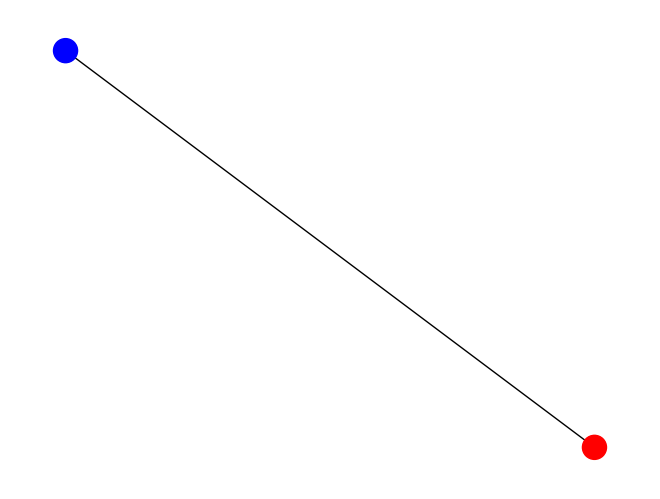

In [2]:
G = nx.Graph()              # Create a graph
G.add_edges_from(edges)     # Add edges to the graph
# Assign colors to nodes
node_colors = [colors[i % ncolors] for i in range(nvertices)]
# Plot the graph
nx.draw(G, with_labels=False, node_color=node_colors)
plt.show()

## Brute Force to solve the GCP

Using the introduced **cost function**, we are going to check *all the possible combinations*.

In [3]:
## INITIAL STATE DEFINITION
initial_state = np.ones(2**nqubits) / np.sqrt(2**nqubits)

# List to put the number of Ground State Vectors solution
ngs = []
counter = 0
for comp_basis in range(2 ** nqubits):
    counter += 1
    bitstring = "{0:0{nbits}b}".format(comp_basis, nbits=nqubits)
    bits = list(map(int, [*bitstring]))
    ## COST FUNCTION DEFINITION (Ising Hamiltonian)
    # First term to ensure that only one color is assigned to every vertex
    cost_fun = sum(
        (1 - sum(bits[i * nvertices + v] for i in range(ncolors))) ** 2
        for v in range(nvertices)
    )

    # Second term to ensure that no two adjacent vertices have the same color
    cost_fun += (sum(sum(bits[i * nvertices + e[0]] * bits[i * nvertices + e[1]] for i in range(ncolors)) for e in edges))

    if cost_fun == 0:
        ngs.append(comp_basis)
        print(f"{bitstring} is a True solution.\n")

0110 is a True solution.

1001 is a True solution.



## Cost function Operator

Now, we have to define the **quantum hamiltonian operator** which acts as the **cost function** regarding in what was explained in the theory.

In [4]:
from qiskit.quantum_info import Pauli, SparsePauliOp

def qham_cf(edges, num_nodes, num_colors):
    """Generate Hamiltonian for the graph coloring problem.

    Args:
        edges: List of edges.
        num_nodes: Number of nodes.
        num_colors: Number of colors.

    Returns:
        Operator for the Hamiltonian
        A constant shift for the obj function.
    """
    pauli_list = []
    coeffs = []

    # Constraint that each node has exactly one color
    for i in range(num_nodes):
        for color in range(num_colors):
            x_p = np.zeros(num_nodes * num_colors, dtype=bool)
            z_p = np.zeros(num_nodes * num_colors, dtype=bool)
            z_p[i * num_colors + color] = True
            pauli_list.append(Pauli((z_p, x_p)))
            coeffs.append(-1)

        for color1 in range(num_colors):
            for color2 in range(color1 + 1, num_colors):
                x_p = np.zeros(num_nodes * num_colors, dtype=bool)
                z_p = np.zeros(num_nodes * num_colors, dtype=bool)
                z_p[i * num_colors + color1] = True
                z_p[i * num_colors + color2] = True
                pauli_list.append(Pauli((z_p, x_p)))
                coeffs.append(2)

    # Constraint that adjacent nodes have different colors
    for i, j in edges:
        for color in range(num_colors):
            x_p = np.zeros(num_nodes * num_colors, dtype=bool)
            z_p = np.zeros(num_nodes * num_colors, dtype=bool)
            z_p[i * num_colors + color] = True
            z_p[j * num_colors + color] = True
            pauli_list.append(Pauli((z_p, x_p)))
            coeffs.append(1)

    return SparsePauliOp(pauli_list, coeffs=coeffs)

qubit_op = qham_cf(edges, nvertices, ncolors)

## QAOA Execution

The basic scheme is based on the `qiskit` example on the [MaxCut problem](https://github.com/qiskit-community/qiskit-algorithms/blob/stable/0.2/docs/tutorials/05_qaoa.ipynb).

In [5]:
from qiskit.primitives import Sampler
from qiskit.result import QuasiDistribution
from qiskit_algorithms import QAOA
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals

sampler = Sampler()


def sample_most_likely(state_vector):
    """Compute the most likely binary string from state vector.
    Args:
        state_vector: State vector or quasi-distribution.

    Returns:
        Binary string as an array of ints.
    """
    if isinstance(state_vector, QuasiDistribution):
        values = list(state_vector.values())
    else:
        values = state_vector
    n = int(np.log2(len(values)))
    k = np.argmax(np.abs(values))
    x = [int(digit) for digit in np.binary_repr(k, n)] # [2:] to chop off the "0b" part
    x.reverse()
    return np.asarray(x)

algorithm_globals.random_seed = 10598

optimizer = COBYLA()
qaoa = QAOA(sampler, optimizer, reps=2)

result = qaoa.compute_minimum_eigenvalue(qubit_op)

Finally, we exctract and print important quantities, which are the vector which is the **most likely to measure**, and the **overlap** of the correct solutions that we now by brute force with the state found.
It is important as it has degenerate solutions.

In [6]:
eigenvects = result.eigenstate

# Compute overlap of correct solution using the ngs list
# as they are the keys of the correct solutions eigenvectors
overlap = 0
for i in ngs:
    overlap += abs(eigenvects[i])
print(f"Overlap with correct solutions: \t {overlap}")  # The closer to 1 the better

print('The most likely eigenvector: \t', sample_most_likely(eigenvects))

Overlap with correct solutions: 	 0.6364257060375048
The most likely eigenvector: 	 [0 1 1 0]


# Solving GCP using Grover's  algorithm
## Introduction
For the sake of comparison, we consider the **Grover's algorithm**, apart from the **QAOA**, as it has already been studied and it is a *model gate-based algorithm* as well.
One can find the fundamental scheme for solving the *vertex coloring problem* using the Grover's algorithm on this [example](https://medium.com/@shoaib6174/how-to-solve-the-graph-coloring-problems-using-qiskits-grover-algorithm-e87eb52f203). Although there are interesting ideas, it does not seem to work and it is a little bit disordered.
We aim to present this work in a more **deep** and **clear** way.

The basic idea consists on being able to **map** everything into an *amplitude amplification problem*,  for which we'll need two things:

1. **Map** the *nodes* and their respective colors into *bitstrings*.
2. Create an **oracle** which, using the information of the *edges*, **signs** the configurations in which **no** *adjacent nodes* have the *same color*.

#### Mapping
For the first step, assume we have one node which can be painted with four different colors. This can be represented as:

- $00\longrightarrow  \text{red node}$
- $01\longrightarrow  \text{green node}$
- $10\longrightarrow  \text{blue node}$
- $11\longrightarrow  \text{black node}$

So, for each **node**, **two qubits** will be used, e. g., the bitstring `110101` is associated to one black node `11` and two green nodes `01`. Therefore, 6 *qubits* are used to express 3 *colored nodes*.


## Oracle
The second part is a bit more complicated.
Let's start with the simplest case possible, that is **two nodes**, $|V|=2$, joined by **one edge**, $|E|=1$.
The **first node** is codified on qubits $(q_0,q_1)$ and the **second** on qubits $(q2,q3)$, as four colors can be assigned to each one of them, $k=4$.
The *necessary* and *sufficient condition* to know that the nodes have different colors is that ($q_0 \neq q_2) \lor (q_1 \neq q_3$).
Thus, the **binary function**, which is 1 when the previous condition is satisfied, is defined as,
$$f(q_0,q_1,q_2,q_3)=1,\quad if \quad (q_0 \neq q_2)\lor (q_1 \neq q_3)$$
$$\quad \quad \quad \quad \quad \quad \quad=1, \quad  if \quad \neg ((q_0 = q_2)\wedge (q_1 = q_3))$$

It is feasible to perform this last operation of the function, due to the existance of the multicontrol $NOT$ connected to an auxiliary qubit.
Naming the auxiliary qubit $\text{check}$, we build  the gate
$$U|q_0,q_1,q_2,q_3,check \rangle = |q_0,q_1,q_2,q_3,check \oplus f(q_0,q_1,q_2,q_3) \rangle $$

The previous is done since if the check qubit starts on $|-\rangle$, we see that
$$U|\vec{q},-\rangle= |\vec{q}\rangle\left( \frac{|0 \oplus f(\vec{q})\rangle - |1 \oplus f(\vec{q})\rangle}{\sqrt{2}}\right )=(-1)^{f(\vec{q})}|\vec{q}\rangle |-\rangle,$$
where $\vec{q}=(q_0,q_1,q_2,q_3)$.
That is, $U$ signs $|\vec{q}\rangle$ if $\vec{q}$ is associated to a configuration in which adjacent nodes have different colors, so the ***solutions can be amplified using Grovers algorithm***!!!

This first oracle is constructed below.

In [7]:
from qiskit import  Aer
simulator=Aer.get_backend('qasm_simulator')
from qiskit import QuantumCircuit
from qiskit.tools.visualization import plot_histogram

from qiskit.algorithms import AmplificationProblem
from qiskit.algorithms import Grover

C:\Users\propietario\AppData\Local\Temp\ipykernel_8804\620177091.py:2: DeprecationWarning: The 'qiskit.Aer' entry point is deprecated and will be removed in Qiskit 1.0. You should use 'qiskit_aer.Aer' directly instead.
  simulator=Aer.get_backend('qasm_simulator')
C:\Users\propietario\AppData\Local\Temp\ipykernel_8804\620177091.py:6: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed in Qiskit 1.0. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms import AmplificationProblem


In [8]:
def two_node_check(qc, qubits_a, qubits_b, check_qubit):
  """
  Performs a check on two nodes (represented by qubits) to ensure they are not in the same state.
  The check is performed for all possible states of two qubits (00, 01, 10, 11).
  If the two nodes are in a different state, the check_qubit is flipped.

  Args:
      qc (QuantumCircuit): The quantum circuit to which the check is applied.
      qubits_a (list): The qubits representing the first node.
      qubits_b (list): The qubits representing the second node.
      check_qubit (Qubit): The qubit that is flipped from 0 to 1
                          if the nodes are in different state.

  Returns:
      None
  """
  # 1. Check if the qubits are in the 11 11 state.
  qc.mct(qubits_a + qubits_b, check_qubit)

  # 2. Check if the qubits are in the 10 10 state.
  qc.x(qubits_a[1])
  qc.x(qubits_b[1])
  qc.mct(qubits_a + qubits_b, check_qubit)
  qc.x(qubits_a[1])
  qc.x(qubits_b[1])

  # 3. Check if the qubits are in the 01 01 state.
  qc.x(qubits_a[0])
  qc.x(qubits_b[0])
  qc.mct(qubits_a + qubits_b, check_qubit)
  qc.x(qubits_a[0])
  qc.x(qubits_b[0])
    
  # 4. Check if the qubits are in the 00 00 state.
  qc.x(qubits_a)
  qc.x(qubits_b)
  qc.mct(qubits_a + qubits_b, check_qubit)
  qc.x(qubits_a)
  qc.x(qubits_b)

  # 5. Negation of the above result (flips the qubit if the states are different).
  qc.x(check_qubit)

Victory can't be declared  yet, since the previous was for a rather trivial case. Nevertheless, it will be useful when moving to the general problem. To treat the situation with $n$ **nodes** and $m$ **edges**, we'll first represent this information with an *array*, that we will call $\textit{Edges}$. Edges will have $m$ components, one per edge on the graph, and each component will have two elements (the linked nodes), which will in turn each have the information of the qubits to which each node is associated to.

To illustrate the previous, suppose we want to represent 3 **nodes** connected by 3 **edges** (the triangle topology).
Associating node 1 to qubits $(q_0,q_1)$, node 2 to qubits  $(q_2,q_3)$ and node 3 to qubits $(q_4,q_5)$, the edges vector would be

In [9]:
variable_qubits = [0, 1, 2, 3, 4, 5] # 6 qubits to represent 6 nodes with 4 different color possibilities
Edges = [[[0, 1], [2, 3]],
        [[0, 1], [4, 5]],
        [[2,3], [4, 5]]
        ]

The first element says nodes 1 and 2 are connected, the second element that nodes 1 and 3 are connected and the  third element that  nodes 2 and 3 are connected.

Now that we have a way to abstract the graph into code, for a given coloring we should make an oracle that:

1. Goes through the Edges array and checks wheter each pair of joined nods have different colors.
2. If all checks are satisfied, flips the state of an auxiliary bit(so that the previously discussed trick with the $|-\rangle$ state can be used to sign a useful coloring).

The two previous requirements imply that, first, for every edge we must have a check qubit(since we need the information of all edges to see wether a coloring was succesful or not), and second, we need a final ancilla qubit to sign the state, which we will call $\textit{target}$.

With the already built 'two_node_check' function, the construction of the  general oracle seems straight forward, since we'd only need to go through all the edges with the function, build the gates associated to the comparisson of the two nodes, and end with a multi-controlled from the check qubits to the target qbit. $\textit{Nevertheless}$, there's a small subtlety and it's that now  the check qubits are ideally not going to be preset on $|-\rangle$ but on $|0\rangle$, so that their values can be properly flipped if the colors are different and then used for the multi-controlled not. The previous brings an issue, and it's that since we want to use the oracle many times we need a way to reste the check qubits, but it can be esaily solved by applying the inverse of the 'two_node_check' after the evaluation of wheter a given coloring was succesful or not.

Due to the previous, we  program the following function,

In [10]:
def reset_check(qc, qubits_a, qubits_b, check_qubit):
  
  # 5. Undo The negation.
  qc.x(check_qubit)
    
  # 4. Undo the Check if the qubits were in 00 00.
  qc.x(qubits_a)
  qc.x(qubits_b)
  qc.mct(qubits_a + qubits_b, check_qubit)
  qc.x(qubits_a)
  qc.x(qubits_b)


  # 3. Undo the check if the qubits were in 01 01.
  qc.x(qubits_a[0])
  qc.x(qubits_b[0])
  qc.mct(qubits_a + qubits_b, check_qubit)
  qc.x(qubits_a[0])
  qc.x(qubits_b[0])

  # 2. Undo the check if the qubits were in 10 10.
  qc.x(qubits_a[1])
  qc.x(qubits_b[1])
  qc.mct(qubits_a + qubits_b, check_qubit)
  qc.x(qubits_a[1])
  qc.x(qubits_b[1])

  # 1. Undo the check if the qubits were in 11 11.
  qc.mct(qubits_a + qubits_b, check_qubit)

Now that everything is ready, we can finally loop over $\textit{Edges}$ and use 'two_node_check' to build the final oracle as follows,

In [11]:
def graph_color_oracle(Edges, variable_qubits, check_qubits, target_qubit):

  num_vars = len(variable_qubits)
  num_checks = len(check_qubits)

  # 1. Initializing a quantum circuit with the target qubit in the |−⟩ state.
  oracle = QuantumCircuit(num_vars + num_checks + 1)
  oracle.x(target_qubit)
  oracle.h(target_qubit)

  # 2. Checking wheter each pair of joined nodes has a different color.
  for edge in range(len(Edges)):
    two_node_check(oracle,Edges[edge][0],Edges[edge][1],check_qubits[edge])

  # 3. Flip the target if all adjacent nodes have different colors.
  oracle.mct(check_qubits, target_qubit)
  
  # 4. Resetting the checks  
  for edge in range(len(Edges)):
    reset_check(oracle,Edges[edge][0],Edges[edge][1],check_qubits[edge])

  return oracle

Now everything is ready to implement Grover's algorithm, we simply need toset all the variable qubits in an even superposition and set the number of times which the algorithm will be ran.

In [12]:
def graph_color_prep(variable_qubits):
  
  num_vars = len(variable_qubits)
  prep = QuantumCircuit(num_vars)
  # Set the variable qubits to |+>^n
  for i in range(num_vars):
    prep.h(i)

  return prep

Now, as a last remark, given a function with $M$ marked elements, ideally the loops over Grover's algorith should be
$$ loops= \frac{\pi}{4}\sqrt{\frac{2^{qubits}}{M}}.$$

Since for the first example we have a triangle topology, if there is at least one solution, there will be $3!$ solutions or more, since any permutation of colors over the nodes will also be a solution, so we'll(roughly) estimate $M=3!$.

In [13]:
# Check and target qubits
check_qubits = [6, 7, 8]
target_qubit = 9

# CREATE THE PREP AND ORACLE CIRCUITS
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle(Edges, variable_qubits, check_qubits, target_qubit)


# DEFINE THE AmplificationProblem

problem = AmplificationProblem(oracle, state_preparation = prep, objective_qubits = variable_qubits)
loops=round(np.pi*np.sqrt(2**(6)/(3*2))/4) # Estimation of ideal number of loops
grover = Grover(iterations = loops, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

C:\Users\propietario\AppData\Local\Temp\ipykernel_8804\3129856601.py:18: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits_a + qubits_b, check_qubit)
C:\Users\propietario\AppData\Local\Temp\ipykernel_8804\3129856601.py:23: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits_a + qubits_b, check_qubit)
C:\Users\propietario\AppData\Local\Temp\ipykernel_8804\3129856601.py:30: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits_a + qubits_b, check_qubit)
C:\User

To test the results given by Grover's algorithm, a brute  force check will be performed over all possibilities, so that later on the histogram the bars associated to succesful possibilities will be painted orange and the rest will be paited blue.

In [14]:
def brute_force_check(state, Edges):
    
  for edge in range(len(Edges)):
    if (state[Edges[edge][0][0]] == state[Edges[edge][1][0]]
        and state[Edges[edge][0][1]] == state[Edges[edge][1][1]]):
        return False 

  return True

In [15]:
def plot_results(result, brute_force, Edges):

  # Plotting results
  counts = result.circuit_results[0]
  plot = plot_histogram(counts, figsize=(int(6*len(counts.keys())**(1/2)), 8), sort='value_desc')
  ax = plot.gca()
  ax.tick_params(axis='x', which='major', labelsize=30)
  ax.set_xlabel("State", fontsize = '60')
  ax.set_ylabel("Count", fontsize = '60')


  correct_count = 0
  states = ax.xaxis.get_ticklabels()
  for i in range(len(states)):
    if brute_force(states[i].get_text(),Edges):
      ax.containers[i][0].set(color = 'orange')
      correct_count += 1
    else:
      ax.containers[i][0].set(color = 'blue')

  leg = plot.legend(['Incorrect (' + str(len(states) - correct_count) + ' counted)',
                     'Correct (' + str(correct_count) + ' counted)'],
                    fontsize = '70',
                    loc = 'upper right')
  leg.legendHandles[0].set_color('blue')
  leg.legendHandles[1].set_color('orange')
  #ax.set_xlim(40,0)

  display(plot)

C:\Users\propietario\AppData\Local\Temp\ipykernel_8804\3238223214.py:25: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[0].set_color('blue')
C:\Users\propietario\AppData\Local\Temp\ipykernel_8804\3238223214.py:26: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  leg.legendHandles[1].set_color('orange')


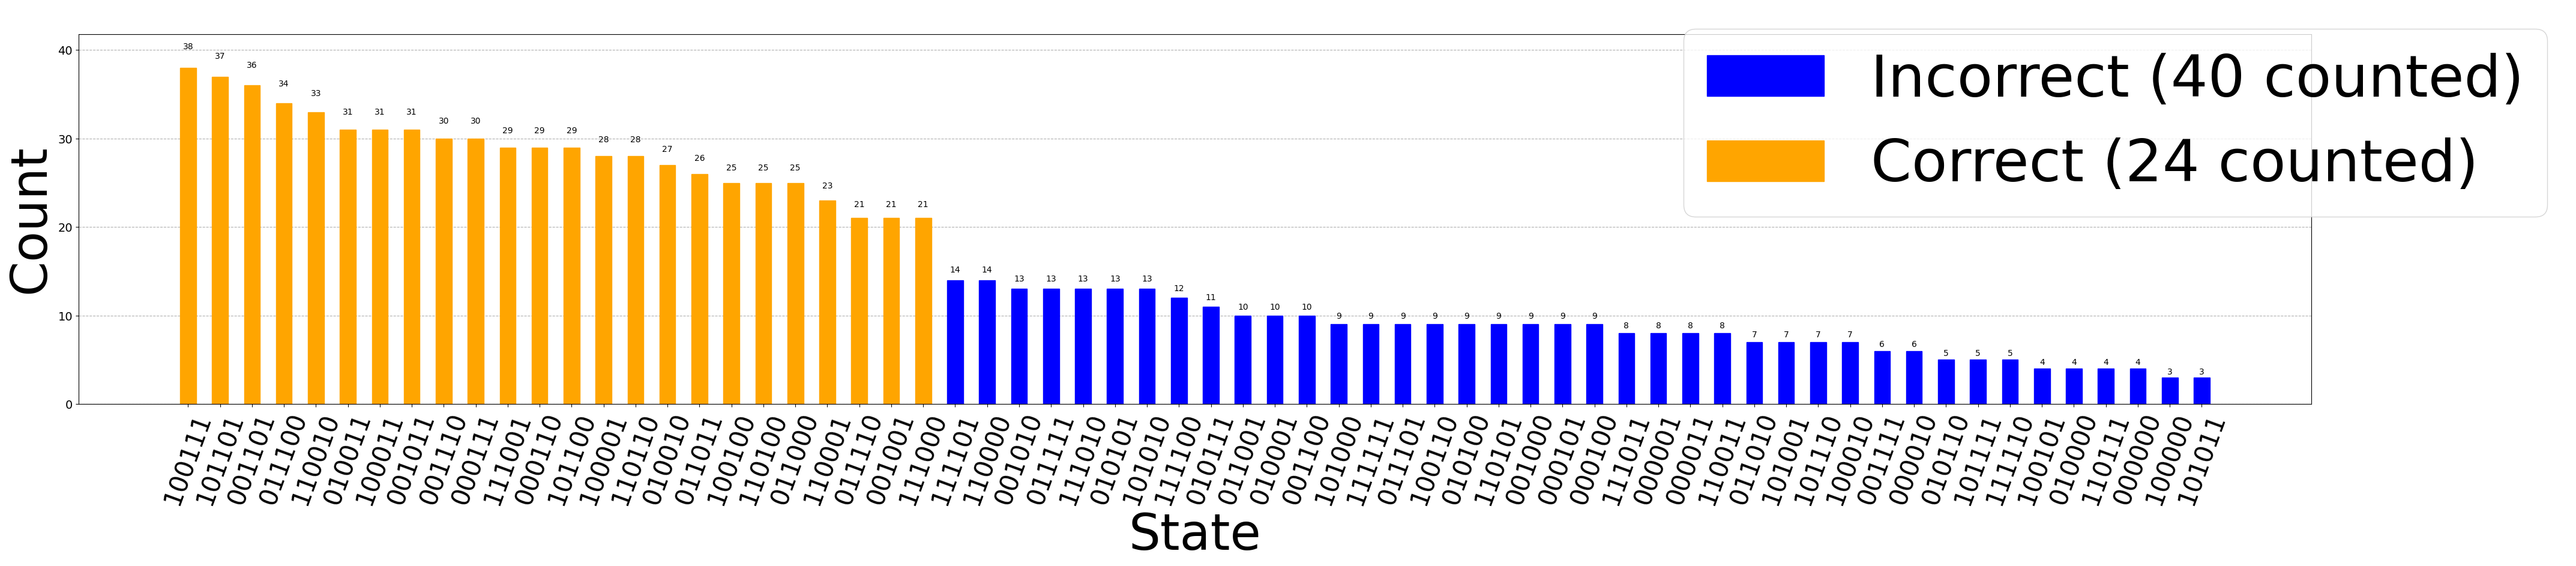

In [16]:
plot_results(results, brute_force_check, Edges)

As we can see, Grover's algorith  was able to accurately highlight the solutions for the triangle topology!. To put it more to the  test, we'll try it with 4  fully connected nodes and see the results.

C:\Users\propietario\AppData\Local\Temp\ipykernel_8804\3129856601.py:18: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits_a + qubits_b, check_qubit)
C:\Users\propietario\AppData\Local\Temp\ipykernel_8804\3129856601.py:23: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits_a + qubits_b, check_qubit)
C:\Users\propietario\AppData\Local\Temp\ipykernel_8804\3129856601.py:30: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits_a + qubits_b, check_qubit)
C:\User

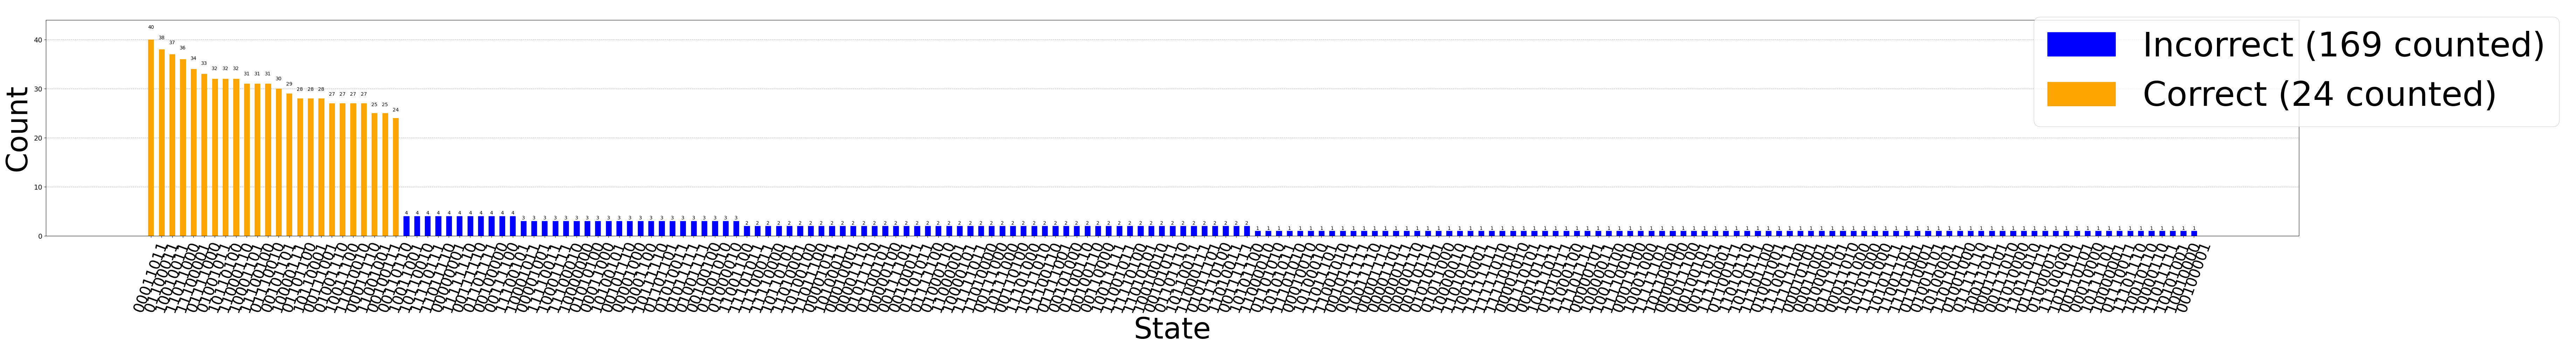

In [17]:
# 4 fully connected nodes

# Defining the qubits and edges

variable_qubits = [0, 1, 2, 3, 4, 5, 6, 7] # 8 qbits to represent 4 nodes with  4 different color possibilities
Edges = [ [[0, 1], [2, 3]],
                  [[0, 1], [4, 5]],
                  [[0, 1], [6, 7]],
                  [[2,3], [4, 5]],
                  [[2, 3], [6, 7]],
                  [[4, 5], [6, 7]]
                 ]
check_qubits = [8, 9, 10, 11, 12, 13] # one check per edge
target_qubit = 14

# oracle
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle(Edges, variable_qubits, check_qubits, target_qubit)

# AmplificationProblem
problem = AmplificationProblem(oracle, state_preparation = prep, objective_qubits = variable_qubits)
loops=round(np.pi*np.sqrt(2**(8)/(4*3*2))/4) # Estimation of ideal number of loops
grover = Grover(iterations = loops, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

#plotting

plot_results(results, brute_force_check, Edges)

So yet again the solutions where  amplified and even better than befor since the number of solutions actually is $M=4!$.

$\textbf{Nevertheless}$, although so far it seems like Grove's algorithm is a perfect tool for tackling the graph coloring problem, there's a HUGE issue which we haven't discussed enough, namely, the number of iterations on Grover's algorith. The ideal amount of times depends the number of marked elements $M$ as $\sqrt{2^{qubits}/M}$, but $\textit{in principle we don't know $M$}$, therefore we'd have to make a guess which will most likely be innacurate.

As an example, we try to solve for the square topology using the same number of iterations as for the fully connected topology, and see what happens.

C:\Users\propietario\AppData\Local\Temp\ipykernel_8804\3129856601.py:18: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits_a + qubits_b, check_qubit)
C:\Users\propietario\AppData\Local\Temp\ipykernel_8804\3129856601.py:23: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits_a + qubits_b, check_qubit)
C:\Users\propietario\AppData\Local\Temp\ipykernel_8804\3129856601.py:30: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed in the Qiskit 1.0.0 release. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(qubits_a + qubits_b, check_qubit)
C:\User

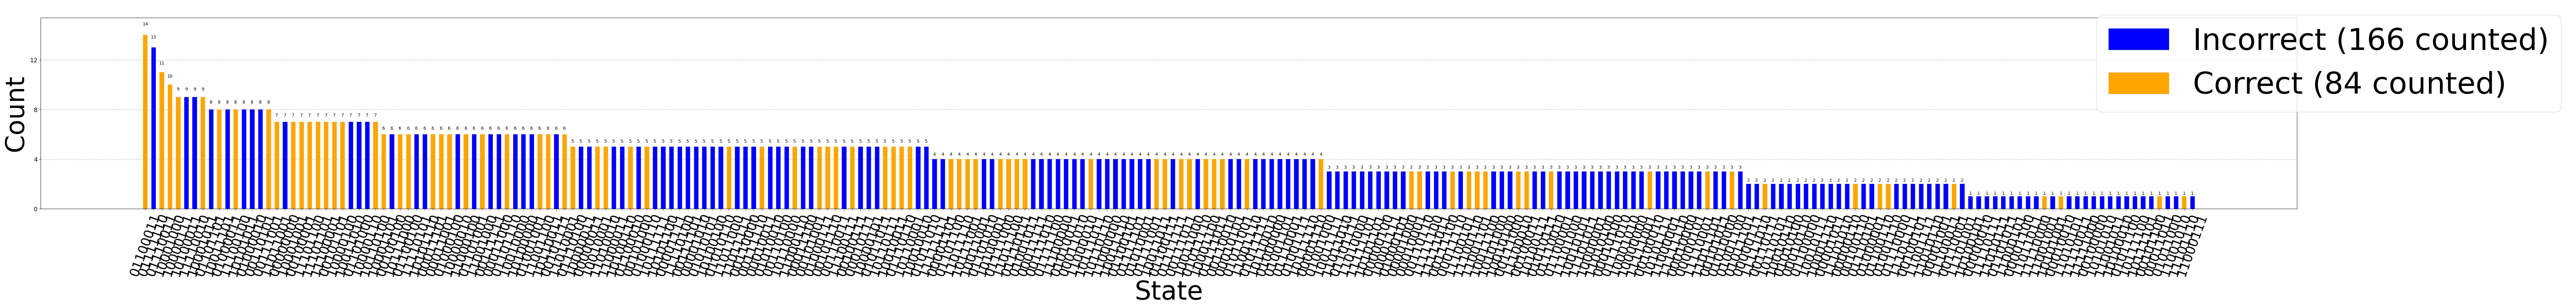

In [18]:
# Square topology

# Defining the qubits and edges

variable_qubits = [0, 1, 2, 3, 4, 5, 6, 7] # 8 qbits to represent 4 nodes with  4 different color possibilities
Edges = [ [[0, 1], [2, 3]],
                  [[2, 3], [4, 5]],
                  [[4, 5], [6, 7]],
                  [[6,7], [0, 1]]
                 ]
check_qubits = [8, 9, 10, 11] # one check per edge
target_qubit = 12

# oracle
prep = graph_color_prep(variable_qubits)
oracle = graph_color_oracle(Edges, variable_qubits, check_qubits, target_qubit)

# AmplificationProblem
problem = AmplificationProblem(oracle, state_preparation = prep, objective_qubits = variable_qubits)
loops=round(np.pi*np.sqrt(2**(8)/(4*3*2))/4) # Estimation of ideal number of loops
grover = Grover(iterations = loops, quantum_instance = Aer.get_backend('qasm_simulator'))
results = grover.amplify(problem)

#plotting
plot_results(results, brute_force_check, Edges)

In conclusion, although an oracle that signs the solutions to the map coloring problem for a given topologyh can be created, the lack of knowledge on the number of solutions(if there's any) greatly affects the effectiveness of the use of Grover's algorithm.